# CLASE 4: GUIA DE EJERCICIOS DE MITAD DE CURSADO

In [1]:
import numpy as np
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
from matplotlib import pyplot as plt

## 1. Stochastic Gradient Descent

a. Implementar en Python un algoritmo basado en Stochastic Gradient Descent
para encontrar numéricamente el mínimo de 
`𝑦 = (𝑥 − 2)**2+3 `
 1. ¿Cuál es el mínimo valor que encontró el algoritmo y para qué valor de x? 
 2. ¿En qué momento detuviste la búsqueda y por qué?
 3. ¿Cómo inicializamos los valoresrandom del algoritmo y cómo afectan la convergencia? 
 4. ¿Cuáles son los hiper parámetros del algoritmo?

In [2]:
def loss_function(x):
  y = np.power(x-2,2)+3
  return y

def gradient(x):
  grad = 2 * (x-2)
  return grad

def SGD(x, lr, epoch, toler):
  loss=[]
  x_values=[]
  for i in range(epoch):
    x_values.append(x)
    loss.append(loss_function(x))
    x_ant=x-lr*gradient(x)
    if np.abs(x_ant-x)<toler:
      break
    x=x_ant
  
  fig, ax = plt.subplots(2, figsize=(10,10))
  ax[0].plot(loss)
  ax[0].set_title("Loss")
  ax[1].plot(x_values)
  ax[1].set_title("X values")
  ax[1].set_xlabel("Epochs")

  print("X: " + str(x))
  print("Y min: " + str(loss_function(x)))

  return x

X: 1.9567654435772432
Y min: 3.0018692268690725


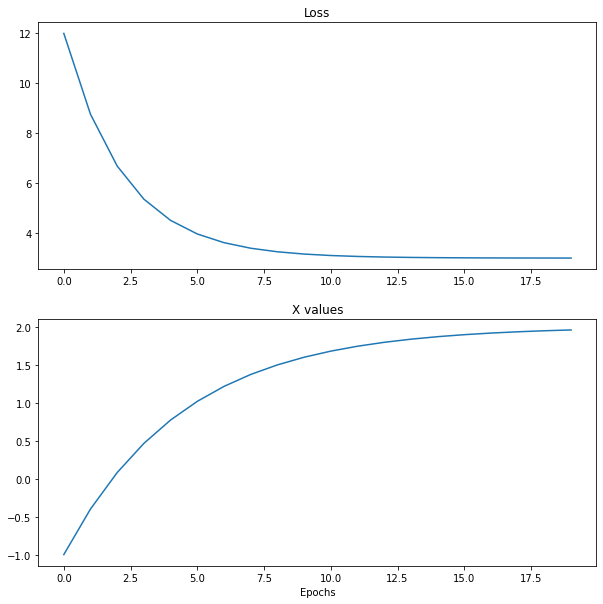

In [3]:
X_min = SGD(x=np.random.randint(-20,20),lr=0.1,epoch=80,toler=0.01)

1. El valor minimo encontrado en Y es de 3 para un valor de X igual a 1.95
2. La busqueda se detuvo cuando ladiferencia entre el X anterior y el X actual fue menor a la tolerancia dada que en este caso es 0.01.
3. El valor de X se inicia con una numero random entre -20 a 20.
4. Los hiperparametros del algoritmos son el learning rate (lr) el numero de epoch (epoch) y el valor de toelrancia (toler)

b. Agregar al algoritmo del punto (a) un momento de primer orden.
1. ¿Cuáles son los hiper parámetros del algoritmo?

In [4]:
def SGD_1_ORD(x, lr, sigma, epoch, toler):
  loss=[]
  x_values=[]
  momento=0
  for i in range(epoch):
    x_values.append(x)
    loss.append(loss_function(x))
    x_ant=x-lr*gradient(x) - sigma * momento
    momento = gradient(x)
    if np.abs(x_ant-x)<toler:
      break
    x=x_ant
  
  fig, ax = plt.subplots(2, figsize=(10,10))
  ax[0].plot(loss)
  ax[0].set_title("Loss")
  ax[1].plot(x_values)
  ax[1].set_title("X values")
  ax[1].set_xlabel("Epochs")

  print("X: " + str(x))
  print("Y min: " + str(loss_function(x)))

  return x

X: 1.9655936
Y min: 3.00118380036096


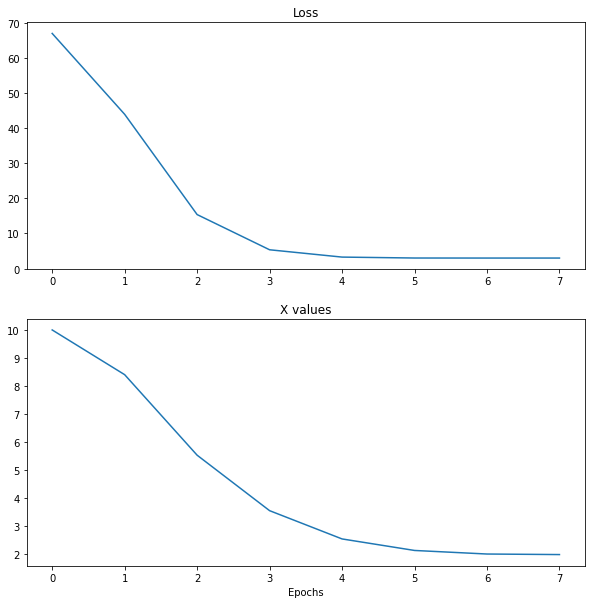

In [5]:
X_min = SGD_1_ORD(x=np.random.randint(-20,20),lr=0.1, sigma=0.1, epoch=80,toler=0.01)

1. Ahora los hiperparametros del algoritmo son el learning rate (lr), sigma (sigma), numero de epoch (epoch) y la tolerancia (toler)

c. Agregar al algoritmo del punto (b) un momento de segundo orden.
1. ¿Cuáles son los hiper parámetros del algoritmo?

In [6]:
def SGD_2_ORD(x, lr, sigma, epsilon, epoch, toler):
  loss=[]
  x_values=[]
  momento1=0
  momento2=0
  for i in range(epoch):
    x_values.append(x)
    loss.append(loss_function(x))
    x_ant=x-lr*gradient(x) - sigma * momento1 - epsilon * momento2
    momento1 = gradient(x)
    momento2 = momento1
    if np.abs(x_ant-x)<toler:
      break
    x=x_ant
  
  fig, ax = plt.subplots(2, figsize=(10,10))
  ax[0].plot(loss)
  ax[0].set_title("Loss")
  ax[1].plot(x_values)
  ax[1].set_title("X values")
  ax[1].set_xlabel("Epochs")

  print("X: " + str(x))
  print("Y min: " + str(loss_function(x)))

  return x

X: 1.972731654022708
Y min: 3.000743562692337


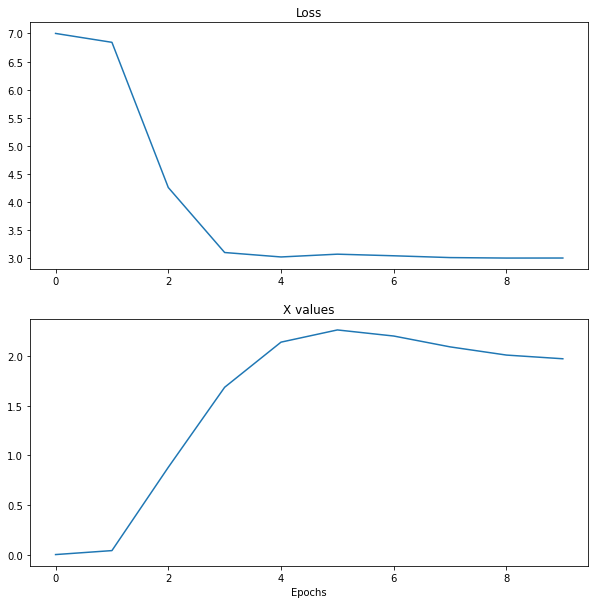

In [7]:
X_min = SGD_2_ORD(x=np.random.randint(-20,20), lr=0.01, sigma=0.1, epsilon=0.1, epoch=100,toler=0.01)

1. Ahora los hiperparametros del algoritmo son el learning rate (lr), sigma (sigma), epsilon (epsilon), numero de epoch (epoch) y la tolerancia (toler)

d. Definir los mismos valores random iniciales para los tres optimizadores (a), (b) y (c). Para todos los casos graficar los gradientes en función de las iteraciones.
1. ¿Qué algoritmo converge más rápido?

In [8]:
def SGD_COMP(x, lr, sigma, epsilon, epoch, toler):
  loss1=[]
  x_values1=[]
  x1 = x
  for i in range(epoch):
    x_values1.append(x1)
    loss1.append(loss_function(x1))
    x1_ant=x1-lr*gradient(x1)
    if np.abs(x1_ant-x1)<toler:
      break
    x1=x1_ant
  
  loss2=[]
  x_values2=[]
  x2 = x
  momento=0
  for j in range(epoch):
    x_values2.append(x2)
    loss2.append(loss_function(x2))
    x2_ant=x2-lr*gradient(x2) - sigma * momento
    if np.abs(x2_ant-x2)<toler:
      break
    x2=x2_ant
  
  loss3=[]
  x_values3=[]
  x3 = x
  momento1=0
  momento2=0
  for k in range(epoch):
    x_values3.append(x3)
    loss3.append(loss_function(x3))
    x3_ant=x3-lr*gradient(x3) - sigma * momento1 - epsilon * momento2
    momento1 = gradient(x3)
    momento2 = momento1
    if np.abs(x3_ant-x3)<toler:
      break
    x3=x3_ant
  
  fig, ax = plt.subplots(2, figsize=(10,10))
  ax[0].plot(loss1, c='blue')
  ax[0].plot(loss2, c='green')
  ax[0].plot(loss3, c='red')
  ax[0].set_title("Loss")
  ax[1].plot(x_values1, c='blue')
  ax[1].plot(x_values2, c='green')
  ax[1].plot(x_values3, c='red')
  ax[1].set_title("X values")
  ax[1].set_xlabel("Epochs")

  print("X1: " + str(x1))
  print("Y1 min: " + str(loss_function(x1)))
  print("X1: " + str(x2))
  print("Y1 min: " + str(loss_function(x2)))
  print("X1: " + str(x3))
  print("Y1 min: " + str(loss_function(x3)))

  return x

X1: 2.499986825040138
Y1 min: 3.249986825213717
X1: 2.499986825040138
Y1 min: 3.249986825213717
X1: 1.9961387524980378
Y1 min: 3.0000149092322714


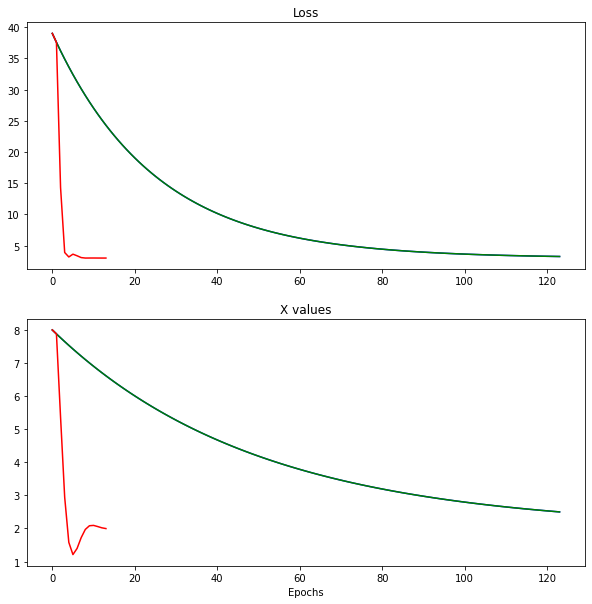

In [9]:
X_min = SGD_COMP(x=np.random.randint(-10,10), lr=0.01, sigma=0.1, epsilon=0.1, epoch=1000,toler=0.01)

## 2. Backpropagation y Regla de la Cadena

a. **Automatic Differentiation:** para el grafo de cómputo que se muestra en la siguiente imagen, con a=1, b=2 y c=3, calcular el valor final de Y y la derivada de Y respecto a cada una de las entradas (a, b y c). Para hacer el cálculo, primero realizar el paso forward y luego utilizar backpropagation con la regla de la cadena.

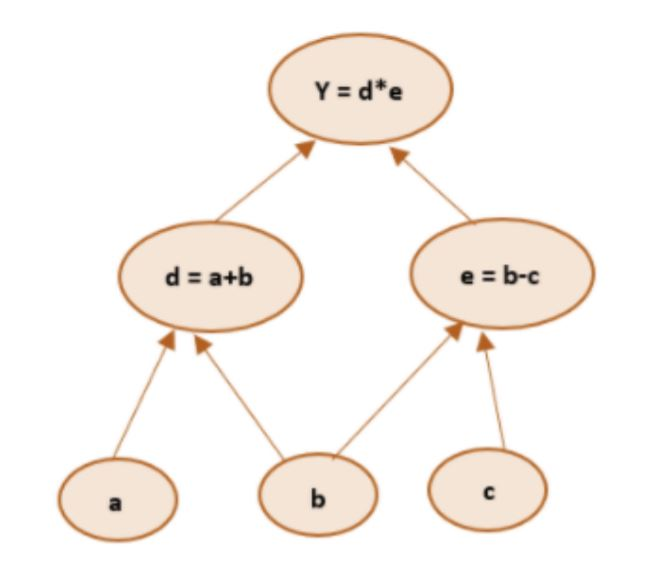

In [10]:
# Forward
a=1
b=2
c=3
d=a+b
e=b-c
Y=d*e
print("d = "+str(d))
print("e = "+str(e))
print("Y = "+str(Y))

d = 3
e = -1
Y = -3


In [11]:
# Backward
# dY/da = dY/dd * dd/da
# dY/db = dY/dd * dd/db + dY/de * de/db
# dY/dc = dY/de * de/dc
dY_dd = e
dY_de = d

dd_da = 1
dd_db = 1
de_db = 1
de_dc = -1

dY_da = dY_dd * dd_da
dY_db = dY_dd * dd_db + dY_de * de_db
dY_dc = dY_de * de_dc

print("dY_da = " + str(dY_da))
print("dY_db = " + str(dY_db))
print("dY_dc = " + str(dY_dc))

dY_da = -1
dY_db = 2
dY_dc = -3


b. **Numerical Differentiation:** para el grafo de cómputo que se muestra en la siguiente imagen, con a=1, b=2 y c=3, utilizar la siguiente expresión y un valor de h pequeño para calcular las derivadas respecto de cada entrada.
Comparar los resultados con los obtenidos en el punto (a)

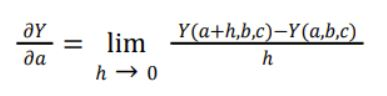

In [12]:
def calcY(a,b,c):
  d = a + b
  e = b - c
  Y = d * e
  return Y

In [13]:
h = 0.001

In [14]:
print("dY_da ~= " + str((calcY(a+h,b,c)-calcY(a,b,c))/h))
print("dY_db ~= " + str((calcY(a,b+h,c)-calcY(a,b,c))/h))
print("dY_dc ~= " + str((calcY(a,b,c+h)-calcY(a,b,c))/h))

dY_da ~= -0.9999999999998899
dY_db ~= 2.0009999999999195
dY_dc ~= -2.9999999999996696


## 3. Deep Learning y Regularización

a. Crear un dataset sintético con 10,000 muestras a partir de la siguiente
expresión, donde N es una normal de media cero y desvío 0.2. Utilizar 80%
de los datos para entrenamiento y 20% de los datos para testing.

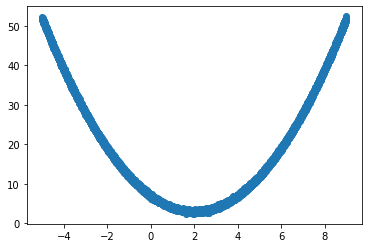

In [55]:
n = 10000
N = np.random.normal(loc=0, scale=0.2, size=n)

x = np.random.uniform(low=-5, high=9, size=n)
y = (x -2)**2 + 3 + N

fig, ax = plt.subplots(1,1)
ax.scatter(x,y)

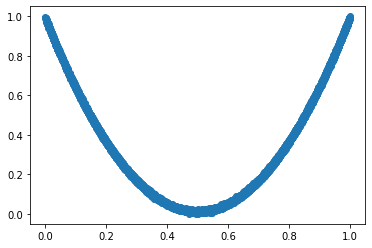

In [56]:
# Normalize dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x.reshape(-1,1))
x = x.reshape((10000,))
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.reshape(-1,1))
y = y.reshape((10000,))
fig, ax = plt.subplots(1,1)
ax.scatter(x,y)

In [57]:
idx_split = round(n*0.8)
x_train = x[:idx_split]
y_train = y[:idx_split]
x_test = x[idx_split:]
y_test = y[idx_split:]

In [58]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8000,)
(8000,)
(2000,)
(2000,)


### Mini-batch SGD

b. Suponer que se tiene un modelo, tal que la relación entre la salida y la entrada está dada por la ecuación presentada a continuación. Suponiendo que se va a utilizar mini-batch SGD para encontrar los valores óptimos de los pesos w1, w2 y w3 tal que minimizan el ECM (Error Cuadrático Medio) (el ECM es la función de costo para este problema), ¿cuál sería la regla de actualización de cada parámetro?. Implementar el algoritmo en Python (usar mini-batch), encontrar los valores óptimos para w1, w2 y w3 y reportar ECM sobre dataset de entrenamiento y dataset de testing.

`𝑦 = 𝑤1𝑥**2 + 𝑤2𝑥 + 𝑤3`

In [61]:
def MB_SGD(xTrain, yTrain, xTest, yTest, lr, epochs, batchs):

  w = np.random.rand(3)

  mse_train = []
  mse_test = []

  xTest_vec = np.vstack((xTest**2, xTest, xTest*0+1))

  for epoch in range(epochs):

    batch_size = int((xTrain.shape[0])/batchs)
    idx = np.random.permutation(xTrain.shape[0])
    xTrain = xTrain[idx]
    yTrain = yTrain[idx]

    train_loss = np.zeros(batchs)
    test_loss = np.zeros(batchs)

    for i in range(batchs):
      batchX = xTrain[i * batch_size:(i + 1) * batch_size]
      batchY = yTrain[i * batch_size:(i + 1) * batch_size]

      batchX_vec =  np.vstack((batchX**2, batchX, batchX*0+1))

      # Forward
      yp = w @ batchX_vec
      ypTest = w @ xTest_vec

      # Errors
      e = batchY - yp
      train_loss[i] = (e**2).mean()

      eTest = (yTest - ypTest)
      test_loss[i] = (eTest**2).mean()

      # Backward
      grad = -2 * np.mean(e * batchX_vec, axis=1)

      # Weights update
      w = w - lr * grad

    mse_train.append(train_loss.mean())
    mse_test.append(test_loss.mean())

  fig, ax = plt.subplots(2, figsize=(10,10))
  ax[0].plot(mse_train)
  ax[0].set_title("Train Loss")
  ax[1].plot(mse_test)
  ax[1].set_title("Test Loss")
  ax[1].set_xlabel("Epochs")
  print("Final train loss: " + str(mse_train[-1]))
  print("Final test loss: " + str(mse_test[-1]))

  return mse_train, mse_test, w


Final train loss: 0.027461696875474412
Final test loss: 0.027098112026472044


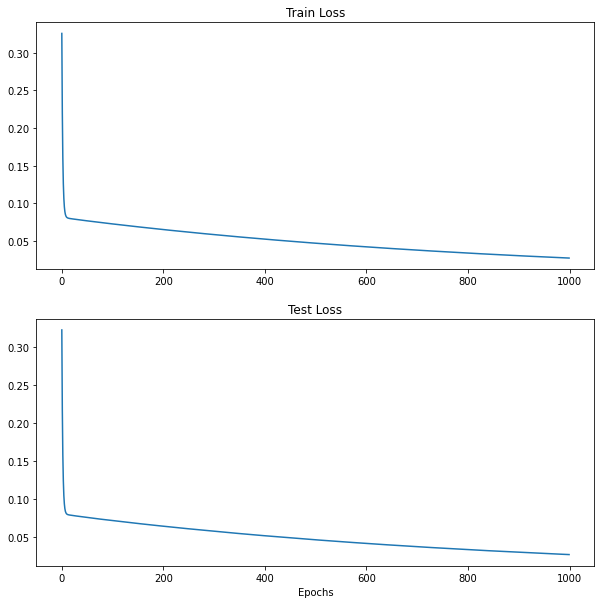

In [64]:
tLoss, vLoss, w = MB_SGD(xTrain = x_train, yTrain=y_train, xTest=x_test, yTest=y_test, lr=0.001, epochs=1000, batchs=100)

In [65]:
print(f"Pesos finales {w}")

Pesos finales [ 1.72361145 -1.64630891  0.58502707]


### Mini-batch SGD + Regularizacion L2

c. Ahora se le agrega regularización l2 a la función de costo, ¿cómo cambia la regla de actualización de cada parámetro?. Implementar el algoritmo en Python (usar mini-batch), encontrar los valores óptimos para w1, w2 y w3 y reportar ECM sobre dataset de entrenamiento y dataset de testing.
Seleccionar manualmente los parámetros para el learning rate y para el coeficiente de regularización.


In [89]:
def MB_SGD_L2(xTrain, yTrain, xTest, yTest, lr, epochs, lamb, batchs):

  w = np.random.rand(3)

  mse_train = []
  mse_test = []

  xTest_vec = np.vstack((xTest**2, xTest, xTest*0+1))

  for epoch in range(epochs):

    batch_size = int((xTrain.shape[0])/batchs)
    idx = np.random.permutation(xTrain.shape[0])
    xTrain = xTrain[idx]
    yTrain = yTrain[idx]

    train_loss = np.zeros(batchs)
    test_loss = np.zeros(batchs)

    for i in range(batchs):
      batchX = xTrain[i * batch_size:(i + 1) * batch_size]
      batchY = yTrain[i * batch_size:(i + 1) * batch_size]

      batchX_vec =  np.vstack((batchX**2, batchX, batchX*0+1))

      # Forward
      yp = w @ batchX_vec
      ypTest = w @ xTest_vec

      # Errors
      e = batchY - yp
      train_loss[i] = (e**2).mean()

      eTest = (yTest - ypTest)
      test_loss[i] = (eTest**2).mean()

      # Backward
      grad = -2 * np.mean(e * batchX_vec, axis=1)

      # Weights update
      w = (1 - lamb * lr / batch_size) *  w - lr * grad

    mse_train.append(train_loss.mean())
    mse_test.append(test_loss.mean())

  # fig, ax = plt.subplots(2, figsize=(10,10))
  # ax[0].plot(mse_train)
  # ax[0].set_title("Train Loss")
  # ax[1].plot(mse_test)
  # ax[1].set_title("Test Loss")
  # ax[1].set_xlabel("Epochs")
  # print("Final train loss: " + str(mse_train[-1]))
  # print("Final test loss: " + str(mse_test[-1]))

  return mse_train, mse_test, w

Final train loss: 0.002838798978565174
Final test loss: 0.002792821511467281


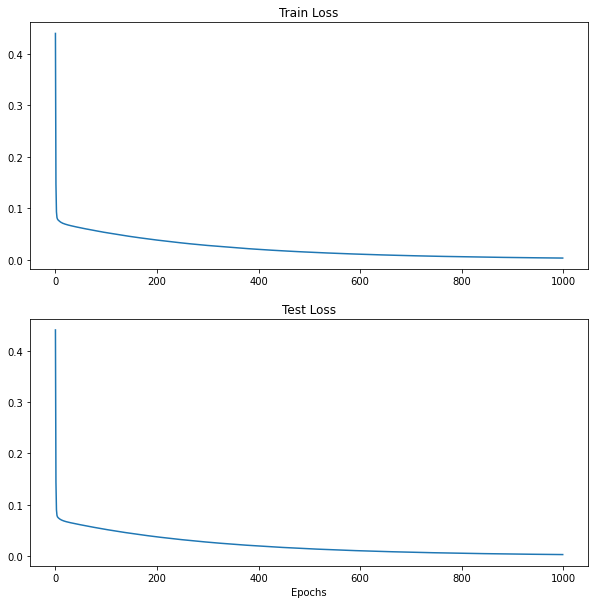

In [67]:
tLoss, vLoss, w = MB_SGD_L2(xTrain = x_train, yTrain=y_train, xTest=x_test, yTest=y_test, lr=0.01, epochs=1000, lamb=0.001, batchs=30)

### Optimización de HP con Grid Search

En lugar de seleccionar manualmente el learning rate y el coeficiente de regularización, utiliza el 10% del dataset de entrenamiento como dataset de validación. Hacer una búsqueda (grid search) de los hiper parámetros que mejor resultado te dan para el ECM sobre el dataset de validación. Luego, utiliza los mejores hiper parámetros para reportar las métricas sobre el dataset de testing.

In [69]:
# 70/10/20 (train/val/test)
idx_split_train = round(n*0.7)
idx_split_val = round(n*0.8)
x_train = x[:idx_split_train]
y_train = y[:idx_split_train]
x_val = x[idx_split_train:idx_split_val]
y_val = y[idx_split_train:idx_split_val]
x_test = x[idx_split_val:]
y_test = y[idx_split_val:]

In [70]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(7000,)
(7000,)
(2000,)
(2000,)
(1000,)
(1000,)


In [90]:
# Grid search
lrs = np.linspace(0.0001, 0.001, 10)
lambdas = np.linspace(1e-7, 0.001, 10)

losses = np.zeros((len(lrs), len(lambdas)))

for i,lr in enumerate(lrs):
  for j,lamb in enumerate(lambdas):
    tLoss, vLoss, w = MB_SGD_L2(xTrain = x_train, yTrain=y_train, xTest=x_val, yTest=y_val, lr=lr, epochs=100, lamb=lamb, batchs=100)
    # tLoss, vLoss, w = MB_SGD(xTrain = x_train, yTrain=y_train, xTest=x_test, yTest=y_test, lr=lr, epochs=100, batchs=50)
    losses[i][j] = vLoss[-1]

In [81]:
losses

array([[0.14441937, 0.20672334, 0.15424619, 0.1017452 , 0.14352501,
        0.1587668 , 0.11533095, 0.16619939, 0.10445825, 0.10788835],
       [0.11809932, 0.10174404, 0.1189154 , 0.09448652, 0.11263078,
        0.09614375, 0.10479936, 0.1299014 , 0.10042891, 0.08767649],
       [0.07972771, 0.08948821, 0.0749272 , 0.08329447, 0.10060899,
        0.13422211, 0.10817054, 0.1194594 , 0.10529597, 0.0967349 ],
       [0.07781899, 0.07644047, 0.09237177, 0.10611477, 0.07651676,
        0.08923912, 0.10029695, 0.07776374, 0.09831896, 0.08047887],
       [0.08637641, 0.09328038, 0.09409469, 0.10350413, 0.08555078,
        0.10689526, 0.09413014, 0.08709219, 0.09679397, 0.0837708 ],
       [0.09606345, 0.07293083, 0.08930683, 0.0994513 , 0.08823918,
        0.08528572, 0.09506452, 0.08764053, 0.07826999, 0.08401848],
       [0.06717227, 0.08428377, 0.09897763, 0.08188479, 0.06890273,
        0.08905792, 0.07422926, 0.1017408 , 0.08443818, 0.08980689],
       [0.09155243, 0.09152846, 0.0813676

In [83]:
i,j = np.unravel_index(np.argmin(losses), losses.shape)
print("Min loss: " + str(losses[i][j]))
print("Learning rate: " + str(lrs[i]))
print("Lambda: " + str(lambdas[j]))
opt_lr = lrs[i]
opt_lamb = lambdas[j]

Min loss: 0.06268177122648154
Learning rate: 0.001
Lambda: 0.001


Final train loss: 0.06388754970164194
Final test loss: 0.0630596385387921


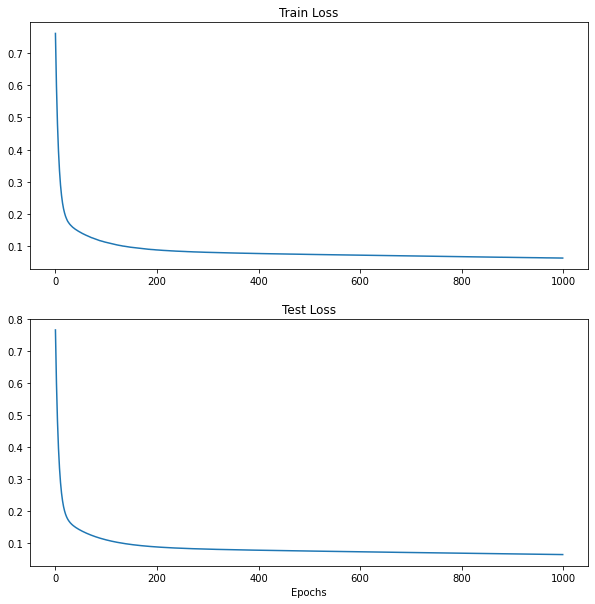

In [84]:
tLoss, tLoss, testW = MB_SGD_L2(xTrain = x_train, yTrain=y_train, xTest=x_test, yTest=y_test, lr=opt_lr, epochs=1000, lamb=opt_lamb, batchs=30)
# tLoss, vLoss, testW = MB_SGD(xTrain = x_train, yTrain=y_train, xTest=x_test, yTest=y_test, lr=opt_lr, epochs=1000, batchs=30)

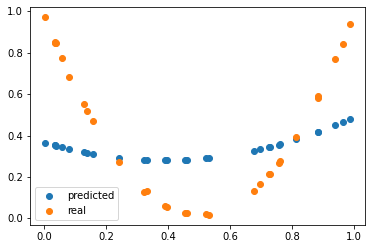

In [87]:
# Visualize examples
n = 30
x_stest = x_test[:n]
y_stest = y_test[:n]

x_stest_vec = np.vstack((x_stest**2, x_stest, x_stest*0+1))
yp_stest = testW @ x_stest_vec

plt.scatter(x_stest, yp_stest, label="predicted")
plt.scatter(x_stest, y_stest, label="real")
plt.legend();

### Deep Learning con PyTorch

e) En los puntos (b), (c) y (d) utilizaste Python para hacer la implementación y el modelo ya estaba establecido. En este punto se pide hacer una implementación con Deep Learning en PyTorch. Las redes neuronales, si tienen la suficiente cantidad de layers y se están utilizando las funciones de activación adecuadas, son capaces de representar cualquier función para mapear la entrada a la salida. Proponer una arquitectura, agregar regularización mediante la técnica dropout, entrenar la red neuronal, buscar los mejores hiper parámetros y presentar el ECM sobre el dataset de testing. Comparar los resultados obtenidos en (e) con los puntos anteriores.

In [42]:
import torch
from torch.utils.data import Dataset, DataLoader

In [43]:
class CustomDataset(Dataset):
    def __init__(self, X, Y):
        super().__init__()
        self.X = X
        self.Y = Y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

In [44]:
training = CustomDataset(xTrain, yTrain)
validation = CustomDataset(xVal, yVal)
testing = CustomDataset(xTest, yTest)

In [45]:
batch_size = 100
training_dataloader = DataLoader(training, batch_size, shuffle=True)
validation_dataloader = DataLoader(validation, batch_size, shuffle=True)
test_dataloader = DataLoader(testing, batch_size, shuffle=True)

In [46]:
class NNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = torch.nn.Linear(in_features=1, out_features=40, bias=True)
        self.relu_1 = torch.nn.LeakyReLU()
        self.dropout_1 = torch.nn.Dropout(0.01)
        self.linear_2 = torch.nn.Linear(in_features=40, out_features=20, bias=True)
        self.relu_2 = torch.nn.LeakyReLU()
        self.dropout_2 = torch.nn.Dropout(0.01)
        self.linear_3 = torch.nn.Linear(in_features=20, out_features=1, bias=True)

    def forward(self, x):
        z1 = self.linear_1(x)
        a1 = self.relu_1(z1)
        d1 = self.dropout_1(a1)
        z2 = self.linear_2(d1)
        a2 = self.relu_2(z2)
        d2 = self.dropout_2(a2)
        y  = self.linear_3(d2)
        return y

In [47]:
nnet = NNet()
print(nnet)

NNet(
  (linear_1): Linear(in_features=1, out_features=40, bias=True)
  (relu_1): LeakyReLU(negative_slope=0.01)
  (dropout_1): Dropout(p=0.01, inplace=False)
  (linear_2): Linear(in_features=40, out_features=20, bias=True)
  (relu_2): LeakyReLU(negative_slope=0.01)
  (dropout_2): Dropout(p=0.01, inplace=False)
  (linear_3): Linear(in_features=20, out_features=1, bias=True)
)


In [48]:
criterion = torch.nn.MSELoss(reduction='mean') # Loss function
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.0005) # Optimizer

In [49]:
for epoch in range(500):

    training_loss = 0
    nnet.train()

    for i, data in enumerate(training_dataloader):

        # batch
        x, y = data
        x = x.float().reshape(-1,1)
        y = y.float().reshape(-1,1)

        # set gradient to zero
        optimizer.zero_grad()

        # forward 
        y_hat = nnet(x)

        # loss
        loss = criterion(y_hat, y)

        # backward
        loss.backward()

        # update of parameters
        optimizer.step()

        # compute metrics and statistics
        training_loss += loss.item()
    
    nnet.eval()
    with torch.no_grad():
      validation_loss = 0

      for i, data in enumerate(validation_dataloader):
          # batch
          x, y = data
          x = x.float().reshape(-1,1)
          y = y.float().reshape(-1,1)

          # forward 
          y_hat = nnet(x)

          # loss
          loss = criterion(y_hat, y)

          # accumulate data
          validation_loss += loss.item()

      if epoch%20 == 0:
        print(f"Epoch = {epoch} | loss = {training_loss / len(training)} | val_loss = {validation_loss / len(validation_dataloader)}")

Epoch = 0 | loss = 0.000987628413098199 | val_loss = 0.07832571193575859
Epoch = 20 | loss = 1.746859318310661e-05 | val_loss = 0.00027051102952100334
Epoch = 40 | loss = 1.2402520161621006e-05 | val_loss = 0.00011764153168769553
Epoch = 60 | loss = 9.52400268371483e-06 | val_loss = 9.720767411636189e-05
Epoch = 80 | loss = 6.30368289213428e-06 | val_loss = 0.00011048993546864949
Epoch = 100 | loss = 5.771114066841879e-06 | val_loss = 8.621276283520274e-05
Epoch = 120 | loss = 4.949362139866155e-06 | val_loss = 7.511348012485541e-05
Epoch = 140 | loss = 4.979735221630628e-06 | val_loss = 7.442575952154584e-05
Epoch = 160 | loss = 3.924023301806301e-06 | val_loss = 9.12554627575446e-05
Epoch = 180 | loss = 3.421098386752419e-06 | val_loss = 9.487848656135612e-05
Epoch = 200 | loss = 3.3945600776600517e-06 | val_loss = 7.566503409179859e-05
Epoch = 220 | loss = 3.361610706113944e-06 | val_loss = 6.689133515465073e-05
Epoch = 240 | loss = 3.2415593658307834e-06 | val_loss = 9.204034868162

In [54]:
test_loss = 0

for i, data in enumerate(test_dataloader):
    # batch
    x, y = data
    x = x.float().reshape(-1,1)
    y = y.float().reshape(-1,1)

    # forward 
    y_hat = nnet(x)

    # loss
    test_loss += criterion(y_hat, y).item()

test_loss = test_loss / len(test_dataloader)

print("DL test loss: " + str(test_loss))

DL test loss: 6.479081966972444e-05


f. Para el punto (e), 
1. ¿qué función de activación seleccionaste y por qué? 

Para la función que hayas seleccionado, explica sus características, su forward y su backward.

Seleccioné una función de activación del tipo **LeakyRELU** para evitar el problema de vanishing gradients si la entrada de esas capas llegara a ser negativa.

Esa fx de activación es muy utilizada ya que otorga alinealidad al modelo sin complicar el cálculo del back-propagation.

`f (x) = x si x > 0 o 0.01*x si x <= 0 f'(x) = 1 si x > 0 o 0.01 si x <= 0`